# VII. Computer Implementation of Random Events

#### Juan Garcia Nila

Write a computer program that simulates events that satisfy the constraints (1)-(3) of problem set 4, problem I. You should provide the program that you write. Specifically, let $X, Y, Z$ be random variables. We want the output of the program to produce $(X, Y, Z)$ such that the following four properties simultaneously hold:

* The random variables $X, Y, Z$ are Bernoulli (i.e., binary-valued).
* $P[X = 1] = 1/4$, $P[Y = 1] = 1/8$, $P[Z = 1] = 1/16$.
* The events \{X = 1\}, \{Y = 1\}, \{Z = 1\} are pairwise independent.
* $P[\{X = 1\} \cap \{Y = 1\} \cap \{Z = 1\}] = 0$.
	
 Write a paragraph to explain how you might verify that your program is working correctly.


In [1]:
#First we import the libraries 
import numpy as np   #numpy for maths
import pandas as pd  #pandas for dataframes
import matplotlib.pyplot as plt   #pyplot for the graphs

import random   #to randomize

In [2]:
A=random.randint(1, 16) #A is a random number between 1 and 16 (16face dice)
B=random.randint(1, 8) #B is a random number between 1 and 8 (8face dice)
C=A+B 

X=0 #We initialize the variables X,Y,Z as zero
Y=0
Z=0

if A in np.array([1, 2, 3, 4]): #X is one if A is 1,2,3 or 4
    X=1
     
if B == 1: #Y=1 if B is one.
    Y=1

if C == 11: #Z=1 if the sum of A and B is eleven.
    Z=1
    
print (X,Y,Z)

0 0 0


 The program basically rolls two dice: an $16-$face fair dice (we assign a random variable $A$ as a random integer number from $1$ to $16$) and a $8-$face fair dice (we assign a random variable $B$ as a random integer number from $1$ to $8$). 
 
We initialize the variables as $X=0$, $Y=0$ and $Z=0$. 

Let $X=1$ if the number result of the toss of the $16-$face dice (variable $A$ in $[1,2,3,4]$) is less or equal than $4$.

Let $Y=1$ if the number result of the toss of the $8-$face dice is $1$ (variable $B==1$) and 

let $Z=1$ be the event that the sum of the numbers in both dice is $11$ (variable $C=A+B==11$).

$X,Y,Z$ are Bernoulli rvs because they are binary-valued (take $0$ or $1$). In the next slide we verify that $P[X=1]=\frac{1}{4}$, $P[Y=1]=\frac{1}{8}$ and $P[Z=1]=\frac{1}{16}$. This is proven by summing the one outcomes of each variable and dividing over the cardinality  of the sample space $16\times 8$.

In [3]:
A=np.array([1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16]) #A is the list of all possible outcomes of 16-face dice
B=np.array([1, 2, 3, 4, 5, 6, 7, 8]) #B is the list of all possible outcomes of 8-face dice

In [4]:
X=np.zeros((8, 16))#We initiliaze X,Y,Z as matrices with 8 rows and 16 columns
Y=np.zeros((8, 16))
Z=np.zeros((8, 16))

for i in range(16):
    if A[i] in np.array([1, 2, 3, 4]): 
        X[:,i]=1                       #the entries of X are one if A[i] is 1,2,3 or 4, else entries are zero

for i in range(8):
    if B[i] == 1:
        Y[i,:]=1                       #the entries of Y are one if B[i] is 1, else entries are zero

for i in range(8):   #i goes over the range of rows
    for j in range(16):  #j goes over the range of columns
        if A[j]+B[i] == 11:            #the entries of Z are one if A[j]+B[i] is eleven.
            Z[i,j]=1      

PX=sum(sum(X))/(16*8)                                 #prob of X=|{X=1}|/|S|
PY=sum(sum(Y))/(16*8)                                 #prob of Y=|{Y=1}|/|S|
PZ=sum(sum(Z))/(16*8)                                 #prob of X=|{X=1}|/|S|
PXY=sum(sum(X*Y))/(16*8)                              #prob of XY=|{X=1,Y=1}|/|S|
PXZ=sum(sum(X*Z))/(16*8)                              #prob of YZ=|{X=1,Z=1}|/|S|
PYZ=sum(sum(Y*Z))/(16*8)                              #prob of XZ=|{Y=1,Z=1}|/|S|
PXYZ=sum(sum(X*Y*Z))/(16*8)                           #prob of XYZ=|{X=1,Y=1,Z=1}|/|S|
PXUYUZ=sum(sum((X+Y+Z!=0).astype(np.int)))/(16*8)     #prob of XUYUZ=|{X=1}, or{Y=1}, or {Z=1}|/|S|

# Create a pandas DataFrame 
df = pd.DataFrame([PX,PY,PZ,PXY,PXZ,PYZ,PXYZ,PXUYUZ] , columns = ['Value'],
                  index =['P[X=1]','P[Y=1]', 'P[Z=1]', 'P[X=1,Y=1]','P[X=1,Z=1]','P[Y=1,Z=1]', 'P[X=1,Y=1,Z=1]','P[X=1 or Y=1 or Z=1]']) 
df

,Value
P[X=1],0.250000
P[Y=1],0.125000
P[Z=1],0.062500
"P[X=1,Y=1]",0.031250
"P[X=1,Z=1]",0.015625
"P[Y=1,Z=1]",0.007812
"P[X=1,Y=1,Z=1]",0.000000
P[X=1 or Y=1 or Z=1],0.382812


Let's create a bar plot to compare visually the probabilities of each event

<BarContainer object of 8 artists>

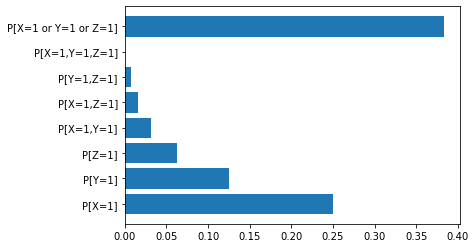

In [5]:
probs=[PX,PY,PZ,PXY,PXZ,PYZ,PXYZ,PXUYUZ]
names=['P[X=1]','P[Y=1]', 'P[Z=1]', 'P[X=1,Y=1]','P[X=1,Z=1]','P[Y=1,Z=1]', 'P[X=1,Y=1,Z=1]','P[X=1 or Y=1 or Z=1]']
plt.barh(names, probs)

It is also proven that \{X = 1\}, \{Y = 1\}, \{Z = 1\} are pairwise independent, $P[\{X = 1\} \cap \{Y = 1\} \cap \{Z = 1\}] = 0$ and $\{X = 1\}, \{Y = 1\}, \{Z = 1\}$ are pairwise independent. $P[\{X = 1\} \cup \{Y = 1\} \cup \{Z = 1\}] = \frac{49}{128}.$

In the last figure we see all the possible outcomes in format $XYZ$ for each given two $A$ and $B$. There are 16 columns and 8 rows in this dataframe corresponding to the outcomes $XYZ$ of dice $A$ and dice $B$

In [6]:
M=100*X+10*Y+Z   #we will show the possible outcomes if format XYZ
M=M.astype(int)  #to switch from boolean matrix to integer matrix
pd.DataFrame(np.char.zfill(M.astype(str), 3), columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
             ,index=['1','2','3','4','5','6','7','8']) #displays a table for XYZ outcomes

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,110,110,110,110,010,010,010,010,010,011,010,010,010,010,010,010
2,100,100,100,100,000,000,000,000,001,000,000,000,000,000,000,000
3,100,100,100,100,000,000,000,001,000,000,000,000,000,000,000,000
4,100,100,100,100,000,000,001,000,000,000,000,000,000,000,000,000
5,100,100,100,100,000,001,000,000,000,000,000,000,000,000,000,000
6,100,100,100,100,001,000,000,000,000,000,000,000,000,000,000,000
7,100,100,100,101,000,000,000,000,000,000,000,000,000,000,000,000
8,100,100,101,100,000,000,000,000,000,000,000,000,000,000,000,000
